In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset : ccbaSAR

- cust_id : 顧客編號 
- lupay : 上月繳款額度 (numerical)
- byymm : 帳務年月 (categorical)
- cycam : 信用額度 (numerical)
- usgam : 已使用額度 (numerical)
- clamt : 本月分期預借現金金額 (numerical)
- csamt : 本月預借現金金額 (numerical)
- inamt : 本月分期消費金額 (numerical)
- cucsm : 本月消費金額 (numerical)
- cucah : 本月借現金額 (numerical)

In [29]:
ccbaSAR = pd.read_excel('ccbaSAR.xlsx')
ccbaSAR.head()

,Unnamed: 0,cust_id,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,504,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,0,61,120106,0,0,0,0,0,0
1,505,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,0,91,120106,390,0,0,0,390,0
2,506,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,390,122,120106,0,0,0,0,0,0
3,507,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,0,153,120106,0,0,0,0,0,0
4,508,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,0,183,120106,0,0,0,0,0,0


In [32]:
# Check the numbers of rows and columns
ccbaSAR.shape

(1776, 11)

In [46]:
# Check if the NA values exist
ccbaSAR.isnull().sum()

Unnamed: 0    0
cust_id       0
lupay         0
byymm         0
cycam         0
usgam         0
clamt         0
csamt         0
inamt         0
cucsm         0
cucah         0
dtype: int64

In [35]:
ccbaSAR.describe()

,Unnamed: 0,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
count,1776.000000,1.776000e+03,1776.000000,1.776000e+03,1.776000e+03,1776.000000,1776.000000,1776.000000,1.776000e+03,1776.000000
mean,30943.895270,5.537534e+05,186.304617,2.176862e+05,6.053525e+04,307.225225,-178.739302,3813.110923,5.537645e+05,307.225225
std,15535.838287,3.094668e+06,113.655992,1.656849e+05,2.052883e+05,5473.081890,5146.725470,13731.251809,3.112415e+06,5473.081890
min,504.000000,0.000000e+00,0.000000,2.029400e+04,-2.910575e+06,0.000000,-201873.000000,0.000000,-4.167280e+05,0.000000
25%,17989.750000,0.000000e+00,91.000000,9.172100e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,28274.500000,9.734500e+03,183.000000,1.706360e+05,1.877550e+04,0.000000,0.000000,0.000000,1.038100e+04,0.000000
75%,46206.250000,5.420975e+04,275.000000,3.093890e+05,7.503075e+04,0.000000,0.000000,1250.000000,5.048575e+04,0.000000
max,58660.000000,5.472467e+07,365.000000,1.037944e+06,4.897106e+06,201873.000000,10094.000000,201464.000000,5.435238e+07,201873.000000


In [82]:
# Display all columns
pd.set_option("display.max_rows", None)
ccbaSAR['byymm'].value_counts()

334    142
365    142
306    140
244    139
275    139
153    138
183    138
214    138
122    136
91     135
61     131
0      129
30     129
Name: byymm, dtype: int64

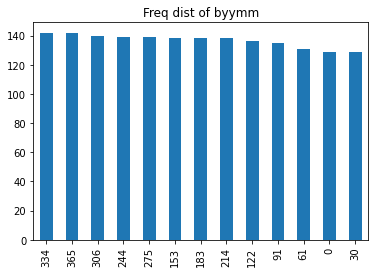

In [40]:
# Draw the barplots for categorical variables
ccbaCategorical = ['byymm']
for col in ccbaCategorical:
    ccbaSAR[col].value_counts().plot.bar(title='Freq dist of '+ col)
    plt.show()

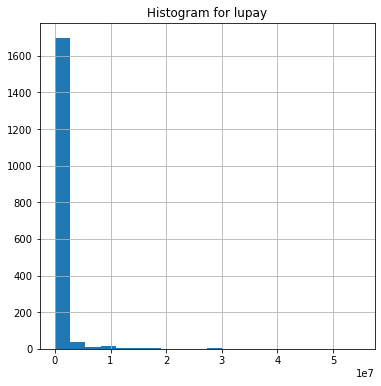

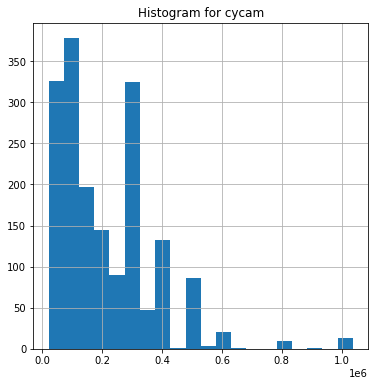

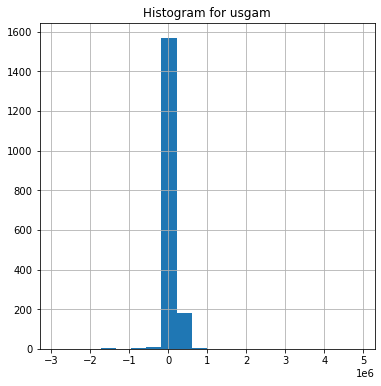

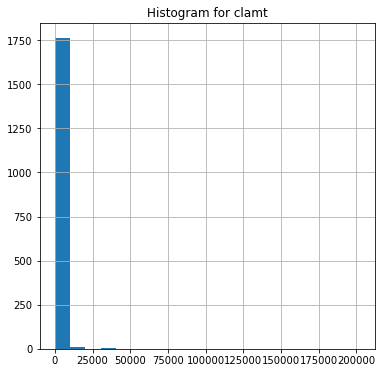

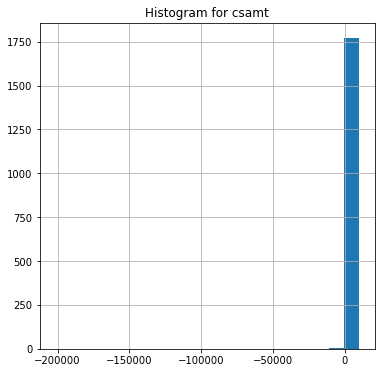

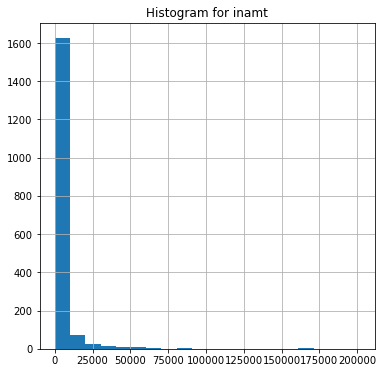

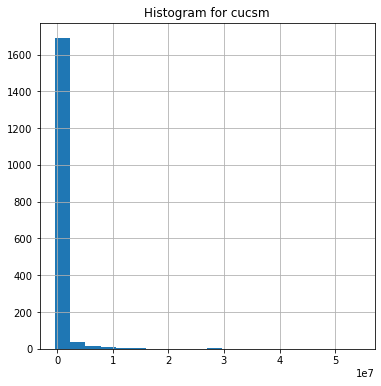

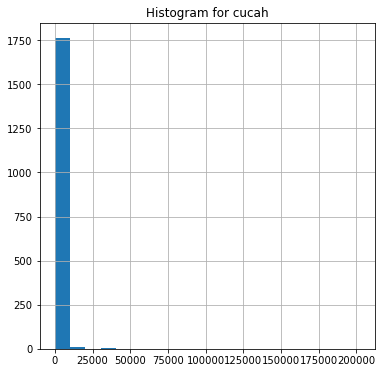

In [85]:
# Draw the histograms for numerical variables
ccbaNumerical = ['lupay','cycam','usgam','clamt','csamt','inamt','cucsm','cucah']
for col in ccbaNumerical:
    ccbaSAR[col].hist(figsize = (6,6), bins = 20)
    plt.title('Histogram for ' + col)
    plt.show()
    
# 可以看得出來，除了信用額度以外的變數都是高峰在於0附近，跟其他數值比例相差非常多！

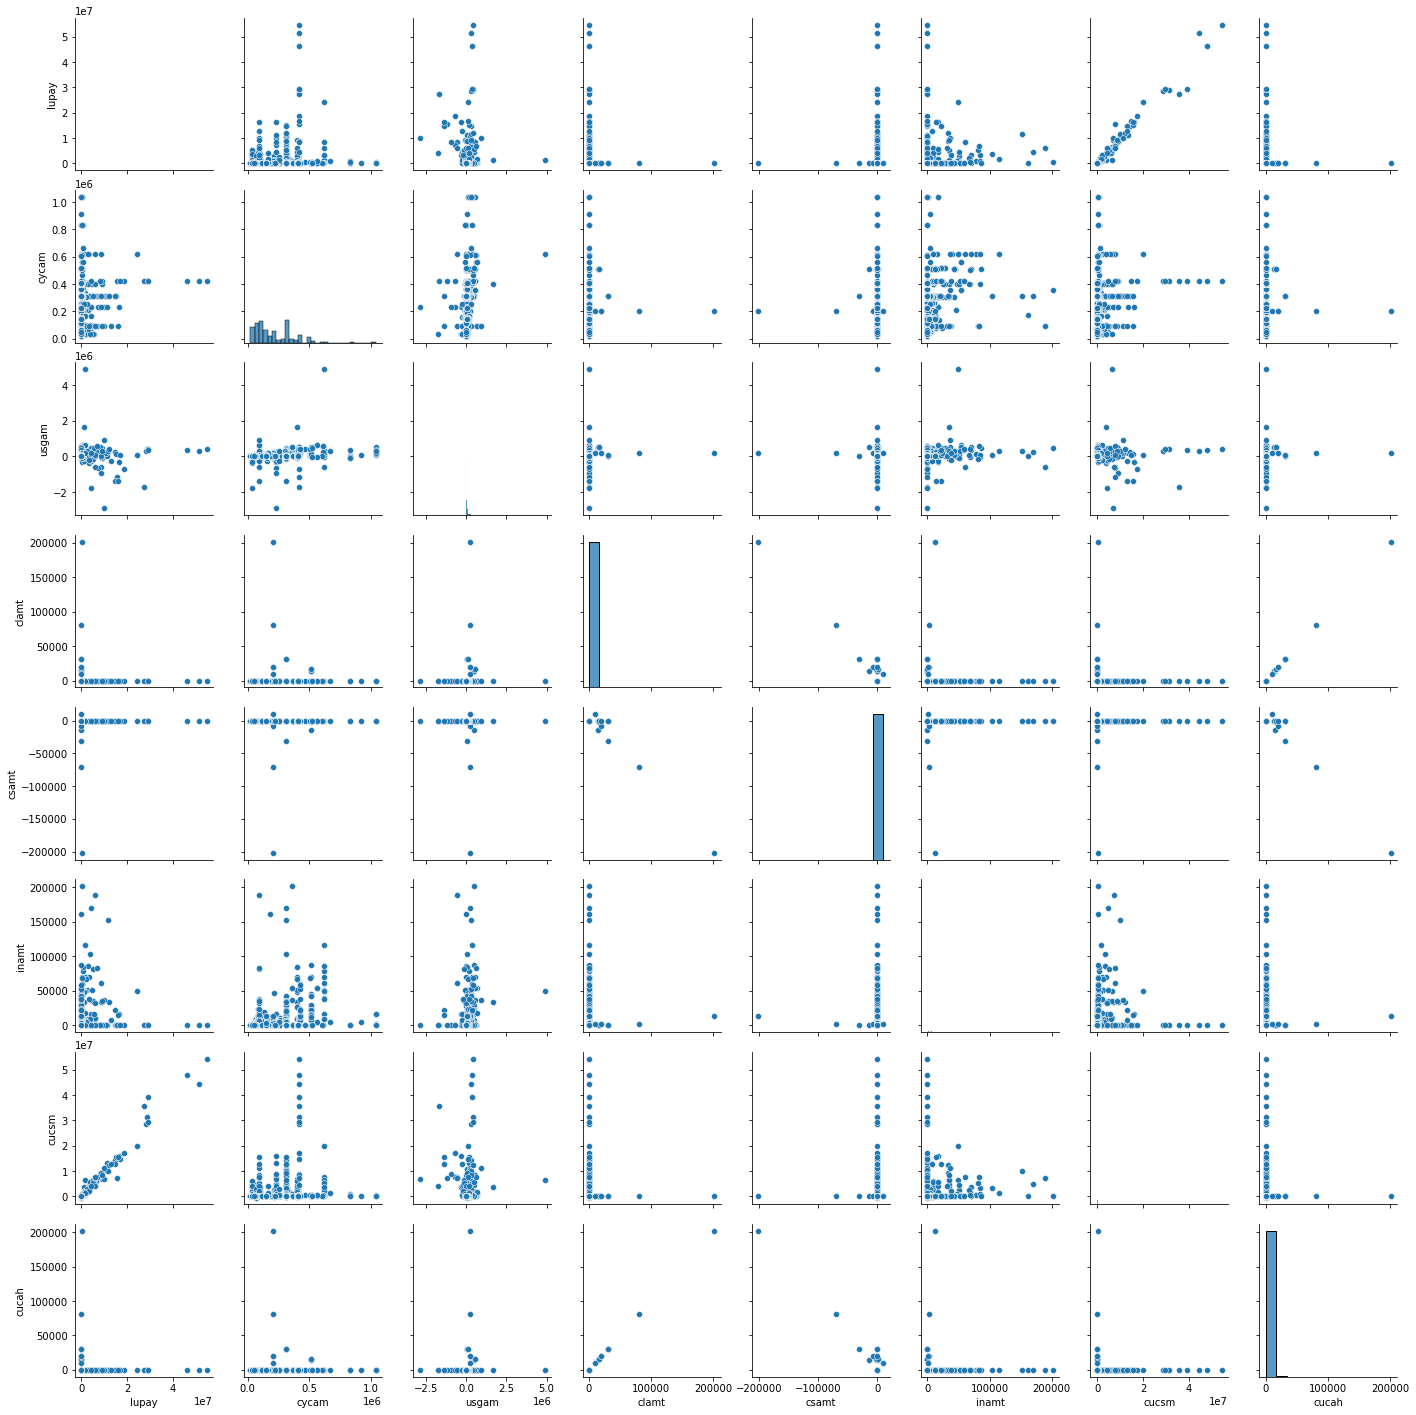

In [45]:
# Show the scatter plots of variables
sns.pairplot(ccbaSAR[['lupay','cycam','usgam','clamt','csamt','inamt','cucsm','cucah']])
plt.show()

# 1. lupay(信用額度)跟cucsm(本月消費金額)呈現高度正相關，代表有較高信用額度的客戶其在消費上的金額通常
#    也會比較高（符合常理）
# 2. 很多變數的圖呈現 L-shaped
# 3. clamt(本月分期預借現金金額)跟csamt(本月預借現金金額)呈現高度負相關，代表償還款項能力不同，越有償還能力
#.   的人會選擇直接預借現金而非分期，因此呈現負相關（？

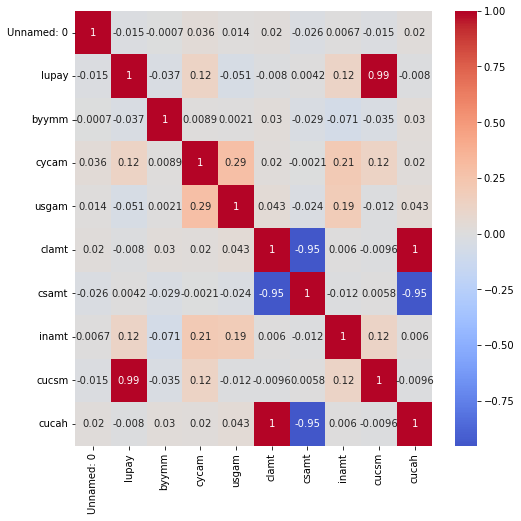

In [54]:
# Show the heatmap and the relationship of correlation
plt.figure(figsize=(8,8))
sns.heatmap(ccbaSAR.corr(), annot = True, center=0.0, cmap='coolwarm');
#sns.heatmap(dataset.corr(), annot = False, center=0.0, cmap='YlGnBu'); # cmap="YlGnBu",
plt.show()

### Dataset : cdtxSAR

- cust_id : 顧客編號
- date : 消費日期 (Categorical)
- country : 消費地國別，130＝台灣 (Categorical)
- cur_type : 消費地幣別，47＝台幣 (Categorical)
- amt : 交易金額-台幣 (Numerical)

In [2]:
cdtxSAR = pd.read_excel('cdtxSAR.xlsx')
cdtxSAR.head()

,Unnamed: 0,cust_id,date,country,cur_type,amt
0,8826,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,114,130,47,390
1,60944,780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...,0,130,47,509
2,60945,780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...,2,130,47,1347
3,60946,780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...,1,130,47,153
4,60947,780a1c6ddd725f1fde827457b227ee70032abfe4c96ed7...,6,130,47,60


In [51]:
cdtxSAR.shape

(183004, 6)

In [52]:
cdtxSAR.isnull().sum()

Unnamed: 0    0
cust_id       0
date          0
country       0
cur_type      0
amt           0
dtype: int64

In [53]:
cdtxSAR.describe()

,Unnamed: 0,date,country,cur_type,amt
count,1.830040e+05,183004.000000,183004.000000,183004.000000,1.830040e+05
mean,4.633590e+05,197.123702,117.426952,39.245705,5.857673e+03
std,1.721420e+05,102.985127,32.055086,12.695806,3.082028e+04
min,8.826000e+03,0.000000,1.000000,1.000000,0.000000e+00
25%,3.526668e+05,100.000000,130.000000,30.000000,2.130000e+02
50%,3.984175e+05,232.000000,134.000000,46.000000,2.450000e+02
75%,5.947582e+05,271.000000,134.000000,47.000000,2.100000e+03
max,1.031869e+06,394.000000,135.000000,56.000000,2.464629e+06


In [80]:
# Display all columns
pd.set_option("display.max_rows", None)
cdtxSAR['date'].value_counts()

258    3241
275    2916
251    2739
257    2684
271    2218
274    2213
267    2197
264    2170
268    2158
270    2155
265    2144
259    2134
278    2002
260    1972
279    1969
261    1697
277    1680
263    1625
269    1564
272    1536
253    1506
254    1499
276    1344
252    1326
232    1260
201    1243
244    1210
73     1193
255    1171
249    1117
229    1086
256    1073
266    1072
169    1043
273    1035
46     1034
84     1028
125     931
92      920
237     892
89      877
239     867
62      861
88      854
177     852
90      850
7       842
134     834
223     824
186     807
315     800
85      774
87      755
83      754
103     739
42      737
51      722
214     714
102     707
40      706
91      699
56      695
47      693
6       690
123     674
58      669
36      658
153     658
34      655
320     649
39      648
19      640
302     633
61      629
227     617
135     617
394     615
63      601
224     585
33      580
44      580
35      576
117     576
41  

In [111]:
cdtxSAR['country'].value_counts(normalize = True)
# 原始資料中，國別134大概佔資料10%
# 而分開後的有洗錢名單資料，國別134佔的比例高達54%
# 因此國別可能是很重要的判斷依據之一

134    0.542780
130    0.265060
52     0.051797
53     0.050103
43     0.046223
68     0.021972
44     0.005022
135    0.003366
42     0.003153
61     0.002322
13     0.001546
57     0.001197
119    0.001131
94     0.000765
41     0.000743
31     0.000377
37     0.000262
93     0.000257
27     0.000251
1      0.000240
36     0.000197
118    0.000175
19     0.000120
10     0.000104
76     0.000098
7      0.000087
67     0.000087
18     0.000082
30     0.000071
87     0.000066
75     0.000060
64     0.000044
129    0.000044
110    0.000027
47     0.000027
78     0.000016
15     0.000016
29     0.000016
16     0.000016
125    0.000011
25     0.000011
90     0.000011
65     0.000011
32     0.000011
105    0.000005
77     0.000005
73     0.000005
17     0.000005
Name: country, dtype: float64

In [3]:
cdtxSAR['cur_type'].value_counts(normalize = True)

46    0.378445
47    0.275814
30    0.140161
13    0.101654
50    0.046163
6     0.026245
19    0.022147
53    0.004973
45    0.002082
56    0.001546
43    0.000235
7     0.000120
16    0.000120
2     0.000109
41    0.000077
1     0.000066
5     0.000016
37    0.000016
40    0.000011
Name: cur_type, dtype: float64

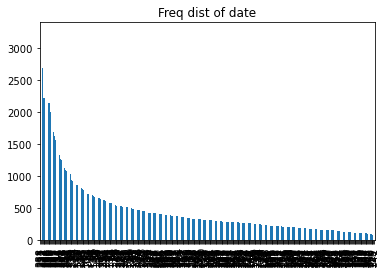

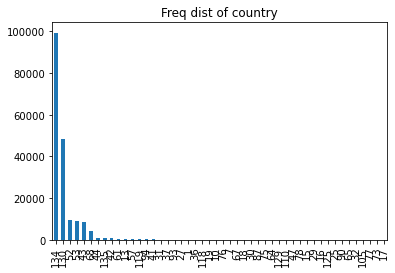

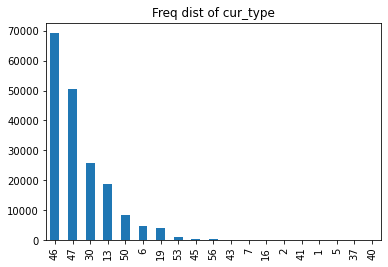

In [58]:
# Draw the barplots for categorical variables
cdtxCategorical = ['date','country','cur_type']
for col in cdtxCategorical:
    cdtxSAR[col].value_counts().plot.bar(title='Freq dist of '+ col)
    plt.show()
    
# 在幣別變數的部分，我們可以知道原始資料是台幣47最多，但在分開後的洗錢資料中是幣別46變次數最多的
# 因此cur_type 應該也是一個需要注意的地方

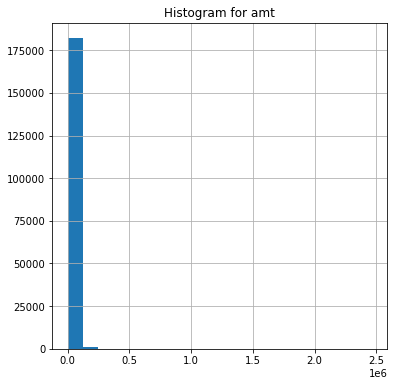

In [104]:
# Draw the histograms for numerical variables
cdtxNumerical = ['amt']
for col in cdtxNumerical:
    cdtxSAR[col].hist(figsize = (6,6), bins = 20)
    plt.title('Histogram for ' + col)
    plt.show()
    
# 幾乎都集中在值很小的周圍，且最大不超過250,000(二十五萬左右)
# 所以其實用消費來洗錢的金額通常不會很大，偏向小額多筆

In [101]:
cdtxSAR['amt'].value_counts()

242        11276
243         9764
10          9644
244         9591
245         7857
212         6831
211         4570
210         4352
12546       2786
6368        2200
217         1995
213         1856
216         1438
241         1377
239         1214
240         1153
209         1118
147          862
146          857
45           848
407          778
1194         646
2445         625
215          602
2460         592
12736        579
145          571
31           559
6273         532
2442         512
30           507
11           475
2561         471
2439         470
2574         455
73           448
11889        420
2479         418
12564        416
1348         412
2565         405
2534         363
2430         357
10445        347
2448         338
104          337
1281         328
2452         323
563          323
2441         318
1221         318
2571         317
105          315
287          311
125179       311
2444         295
140          294
2524         287
214          2

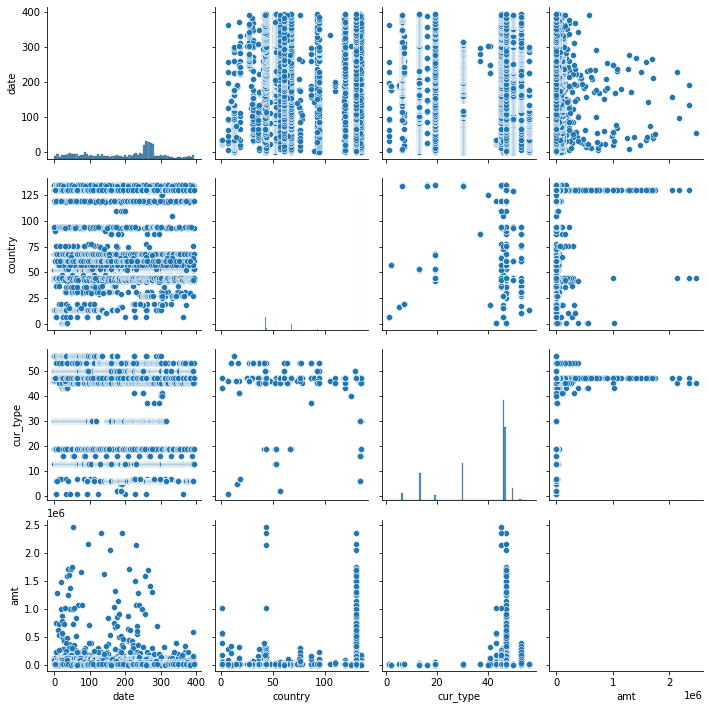

In [103]:
# Show the scatter plots of numerical variables
sns.pairplot(cdtxSAR[['date','country','cur_type','amt']])
plt.show()

# amt(交易金額)和country(消費地國家)、cur_type(幣別)都是低正相關性

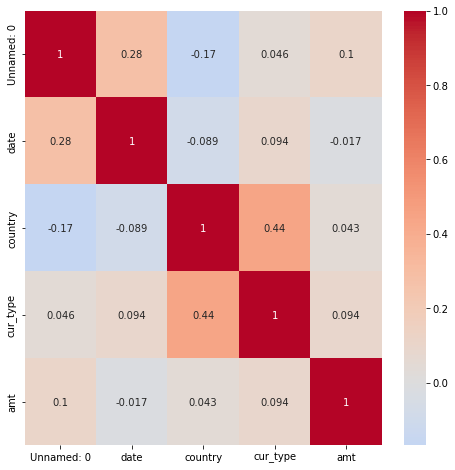

In [95]:
# Show the heatmap and the relationship of correlation
plt.figure(figsize=(8,8))
sns.heatmap(cdtxSAR.corr(), annot = True, center=0.0, cmap='coolwarm');
#sns.heatmap(dataset.corr(), annot = False, center=0.0, cmap='YlGnBu'); # cmap="YlGnBu",
plt.show()

### Dataset : custinfoSAR

- cust_id : 顧客編號
- alert_key : alert主鍵 
- risk_rank : 風險等級 (Categorical)
- occupation_code : 職業 (Categorical)
- total_asset : 行內總資產 (Numerical)
- AGE : 年齡 (Categorical)

In [60]:
custinfoSAR = pd.read_excel('custinfoSAR.xlsx')
custinfoSAR.head()

,Unnamed: 0,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE
0,1926,171770,25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c510...,1,17,1913895,4
1,2026,172480,7fde997da7e7a95280460889004bd2f23050bd8953de7e...,3,12,8251,4
2,2281,174298,bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...,1,19,186714,7
3,3443,177788,6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...,1,15,1744729,5
4,3479,177960,26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...,1,9,238193,2


In [61]:
custinfoSAR.shape

(234, 7)

In [62]:
custinfoSAR.isnull().sum()

Unnamed: 0         0
alert_key          0
cust_id            0
risk_rank          0
occupation_code    0
total_asset        0
AGE                0
dtype: int64

In [64]:
custinfoSAR.describe()

,Unnamed: 0,alert_key,risk_rank,occupation_code,total_asset,AGE
count,234.000000,234.000000,234.000000,234.000000,2.340000e+02,234.000000
mean,10352.055556,230223.884615,1.179487,13.799145,6.466978e+05,3.333333
std,5210.421747,42148.542556,0.525984,5.198035,1.728137e+06,1.193689
min,1926.000000,171770.000000,1.000000,1.000000,0.000000e+00,1.000000
25%,6291.250000,196276.500000,1.000000,12.000000,7.739500e+03,2.000000
50%,8795.500000,216666.500000,1.000000,15.000000,1.071490e+05,3.000000
75%,13554.500000,257296.750000,1.000000,18.000000,5.061942e+05,4.000000
max,25673.000000,351367.000000,3.000000,19.000000,1.442488e+07,8.000000


In [109]:
custinfoSAR['risk_rank'].value_counts(normalize = True)

# 等級1的比例在洗錢分割後的資料從67%上升到88%，有明顯提高，代表這群類型的人也是需要注意的族群

1    0.884615
3    0.064103
2    0.051282
Name: risk_rank, dtype: float64

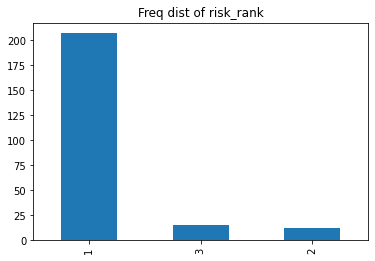

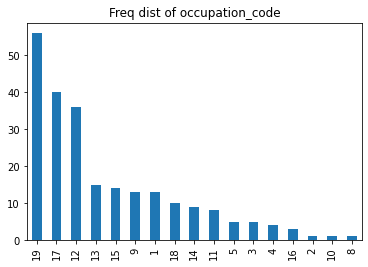

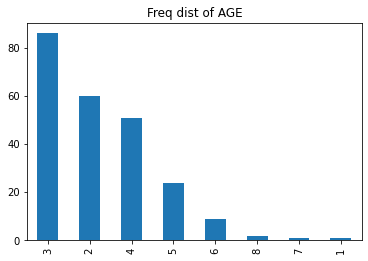

In [74]:
# Draw the barplots for categorical variables
custinfoCategorical = ['risk_rank','occupation_code','AGE']
for col in custinfoCategorical:
    custinfoSAR[col].value_counts().plot.bar(title='Freq dist of '+ col)
    plt.show()
    
# 風險等級等於1 的客戶明顯多於其他兩個等級
# 年齡落在20-40歲，青壯年時期的人比較容易從事洗錢行為

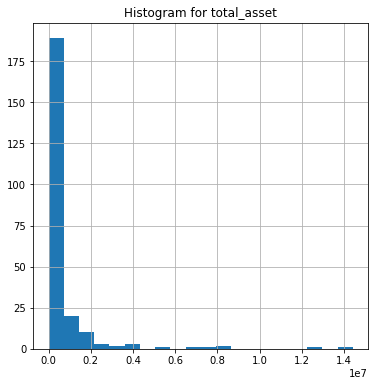

In [87]:
# Draw the histograms for numerical variables
custinfoNumerical = ['total_asset']
for col in custinfoNumerical:
    custinfoSAR[col].hist(figsize = (6,6), bins = 20)
    plt.title('Histogram for ' + col)
    plt.show()

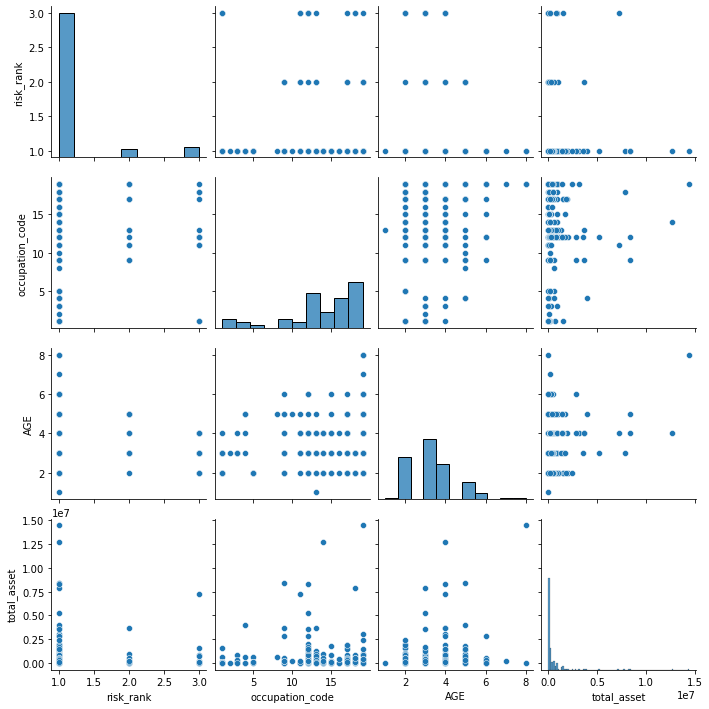

In [92]:
# Show the scatter plots of numerical variables
sns.pairplot(custinfoSAR[['risk_rank','occupation_code','AGE','total_asset']])
plt.show()

# 此資料變數之間的相關性都蠻低的

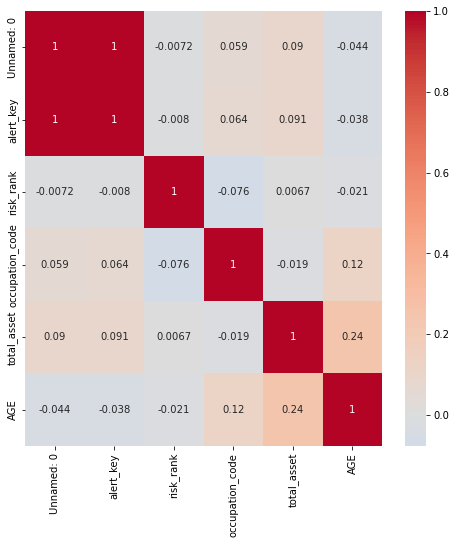

In [96]:
# Show the heatmap and the relationship of correlation
plt.figure(figsize=(8,8))
sns.heatmap(custinfoSAR.corr(), annot = True, center=0.0, cmap='coolwarm');
#sns.heatmap(dataset.corr(), annot = False, center=0.0, cmap='YlGnBu'); # cmap="YlGnBu",
plt.show()

### Dataset : dpSAR

- cust_id : 顧客編號
- debit_credit : 借貸別 (Categorical)
- tx_date : 交易日期 (Categorical)
- tx_time : 交易時間 (Categorical)
- tx_type : 交易類別 (Categorical)
- tx_amt : 交易金額 (Numerical)
- exchg_rate : 匯率 (Numerical)
- info_asset_code : 資訊資產代號 (Categorical)
- fiscTxId : 交易代碼 (Categorical)
- txbranch : 分行代碼 (Categorical)
- cross_bank :是否為跨行交易 (Categorical)
- ATM : 是否為實體ATM交易 (Categorical)

In [3]:
dpSAR = pd.read_excel('dpSAR.xlsx')
dpSAR.head(20)

,Unnamed: 0,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
0,157479,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,DB,175,15,2,141.0,27.820,20,NaN,NaN,0,1
1,157480,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,CR,151,11,2,136.0,27.825,20,NaN,NaN,0,1
2,157481,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,CR,152,15,2,201.0,27.765,20,NaN,NaN,0,1
3,157482,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,CR,169,15,2,859.0,27.725,20,NaN,NaN,0,1
4,157483,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,CR,159,14,2,329.0,27.605,20,NaN,NaN,0,1
5,157484,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,DB,151,11,2,162.0,27.860,20,NaN,NaN,0,1
6,157485,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,CR,153,10,2,402.0,27.715,20,NaN,NaN,0,1
7,157486,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,DB,153,15,2,667.0,27.780,20,NaN,NaN,0,1
8,157487,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,CR,154,13,2,2010.0,27.715,20,NaN,NaN,0,1
9,157488,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,CR,174,14,2,10539.0,27.815,20,NaN,NaN,0,1


In [66]:
dpSAR.shape

(249012, 13)

In [67]:
dpSAR.isnull().sum()

# 這筆資料在tx_amt, fiscTxId, and txbranch有很多缺值
# 我覺得交易代碼及分行代碼可能對於洗錢分析較為不重要或許可以直接拔掉
# 但是在交易金額這項可能會需要想一個填補缺值的辦法

Unnamed: 0              0
cust_id                 0
debit_credit            0
tx_date                 0
tx_time                 0
tx_type                 0
tx_amt               1368
exchg_rate              0
info_asset_code         0
fiscTxId           100787
txbranch            93961
cross_bank              0
ATM                     0
dtype: int64

In [68]:
dpSAR.describe()

,Unnamed: 0,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
count,2.490120e+05,249012.000000,249012.000000,249012.000000,2.476440e+05,249012.000000,249012.000000,148225.000000,155051.000000,249012.000000,249012.000000
mean,1.096923e+06,211.875705,13.177301,1.931666,1.333831e+05,3.986320,12.681108,6.241579,194.677403,0.454295,0.870902
std,4.560321e+05,110.469789,5.889878,0.274267,1.329773e+06,8.444409,4.895107,5.338305,125.969970,0.497908,0.335309
min,1.574790e+05,0.000000,0.000000,1.000000,-5.167542e+06,0.226000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.584698e+05,116.000000,10.000000,2.000000,8.770000e+02,1.000000,13.000000,4.000000,92.000000,0.000000,1.000000
50%,1.081904e+06,229.000000,14.000000,2.000000,5.135000e+03,1.000000,13.000000,4.000000,279.000000,0.000000,1.000000
75%,1.521073e+06,304.000000,17.000000,2.000000,4.100450e+04,1.000000,13.000000,4.000000,313.000000,1.000000,1.000000
max,1.965702e+06,394.000000,23.000000,3.000000,3.189654e+08,110.155630,21.000000,28.000000,370.000000,1.000000,1.000000


In [79]:
# Display all columns
pd.set_option("display.max_rows", None)
dpSAR['tx_date'].value_counts()

250    1412
249    1301
64     1299
264    1270
253    1203
312    1190
251    1170
246    1169
258    1159
236    1141
284    1139
280    1124
252    1111
302    1101
316    1074
375    1068
279    1066
174    1063
277    1045
260    1036
278    1034
256    1034
323    1029
167    1011
243    1008
81     1005
259    1001
244    1001
334    1001
257     994
245     992
286     991
372     987
285     987
328     985
152     982
287     972
281     968
370     965
315     963
319     963
299     960
329     953
314     948
83      948
300     945
330     944
301     940
343     939
263     938
313     931
151     914
272     913
326     906
291     906
82      904
85      903
145     901
153     899
159     899
344     898
271     897
288     894
340     893
57      890
322     875
235     872
270     870
265     870
294     869
371     867
90      863
376     862
336     859
337     855
242     853
208     845
273     844
160     844
365     835
194     835
341     834
320     832
348 

In [112]:
dpSAR['tx_time'].value_counts(normalize = True)

# 小時的部分跟原始資料分布沒有相差很多，我認為此變數可以拿掉

14    0.159924
15    0.130158
13    0.050447
12    0.050427
9     0.046480
11    0.044195
22    0.043893
10    0.042721
21    0.041584
16    0.039360
1     0.038127
20    0.036376
0     0.035850
19    0.034167
18    0.033914
23    0.033838
17    0.033685
8     0.020650
5     0.017598
2     0.016333
6     0.014566
7     0.014549
3     0.011212
4     0.009947
Name: tx_time, dtype: float64

In [113]:
dpSAR['tx_type'].value_counts(normalize = True)

# 交易類型的部分跟原始資料分布沒有相差很多，我認為此變數可以拿掉

2    0.920108
1    0.074113
3    0.005779
Name: tx_type, dtype: float64

In [115]:
dpSAR['ATM'].value_counts(normalize = True)

1    0.870902
0    0.129098
Name: ATM, dtype: float64

In [6]:
dpSAR['fiscTxId'].value_counts()

4.0     112420
7.0      13737
21.0      8073
20.0      7940
3.0       2414
22.0      1091
6.0        611
5.0        515
16.0       365
2.0        354
13.0       291
0.0        235
14.0       106
23.0        39
28.0        22
10.0         5
18.0         3
27.0         1
26.0         1
15.0         1
1.0          1
Name: fiscTxId, dtype: int64

In [7]:
dpSAR['txbranch'].value_counts()

313.0    34769
0.0      25006
279.0    15129
147.0    12573
310.0     9153
         ...  
263.0        1
236.0        1
116.0        1
252.0        1
234.0        1
Name: txbranch, Length: 249, dtype: int64

In [116]:
dpSAR['info_asset_code'].value_counts(normalize = True)

13    0.625829
20    0.117508
16    0.109368
1     0.092140
2     0.024240
12    0.014911
15    0.005787
0     0.004048
4     0.003691
6     0.001446
17    0.000683
5     0.000137
19    0.000068
21    0.000044
14    0.000040
8     0.000032
3     0.000024
18    0.000004
Name: info_asset_code, dtype: float64

In [117]:
dpSAR['cross_bank'].value_counts(normalize = True)

0    0.545705
1    0.454295
Name: cross_bank, dtype: float64

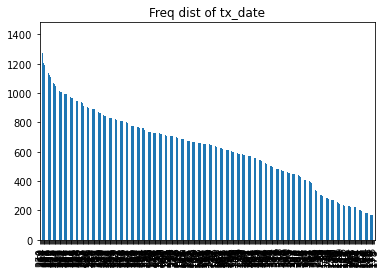

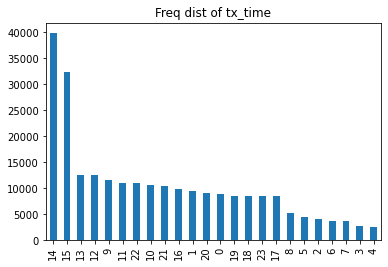

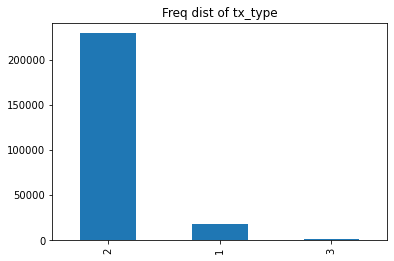

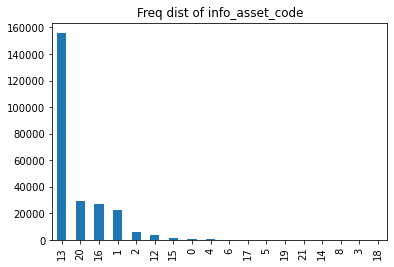

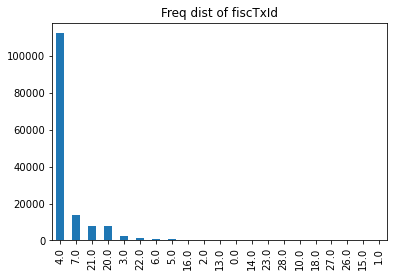

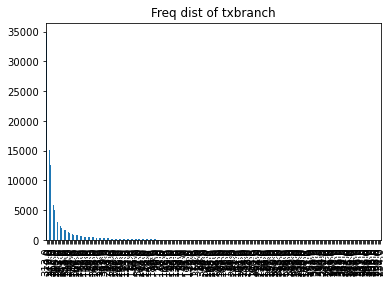

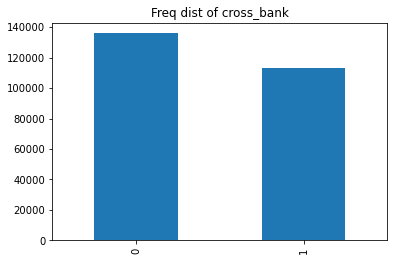

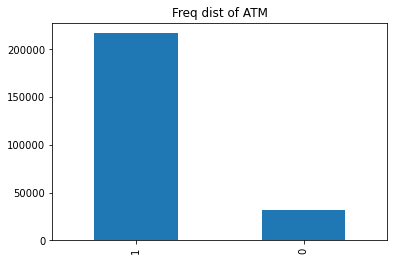

In [93]:
# Draw the barplots for categorical variables
dpCategorical = ['tx_date','tx_time','tx_type','info_asset_code','fiscTxId','txbranch','cross_bank','ATM']
for col in dpCategorical:
    dpSAR[col].value_counts().plot.bar(title='Freq dist of '+ col)
    plt.show()

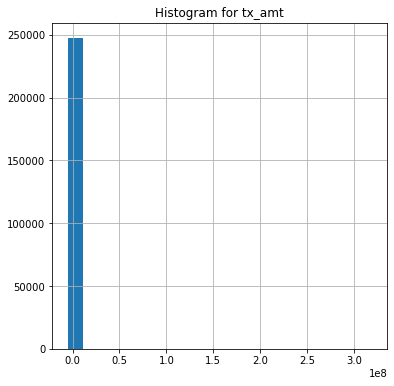

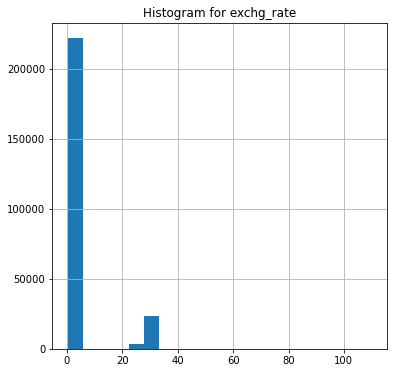

In [88]:
# Draw the histograms for numerical variables
dpNumerical = ['tx_amt','exchg_rate']
for col in dpNumerical:
    dpSAR[col].hist(figsize = (6,6), bins = 20)
    plt.title('Histogram for ' + col)
    plt.show()
    
# 交易金額都蠻小的，且負值是什麼意思？(神秘轉換過後跟正負無關，只跟大小有關)

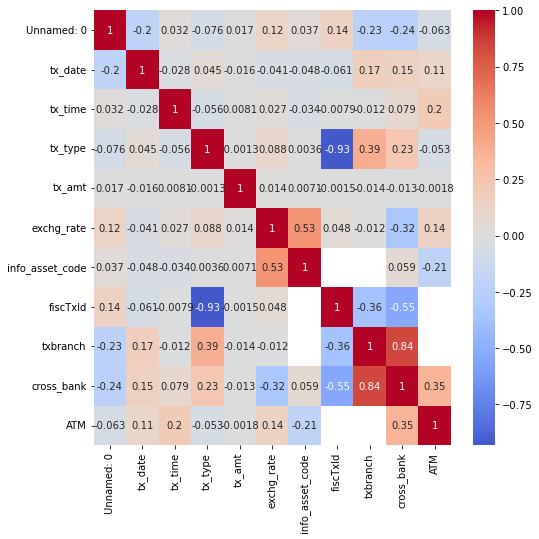

In [97]:
# Show the heatmap and the relationship of correlation
plt.figure(figsize=(8,8))
sns.heatmap(dpSAR.corr(), annot = True, center=0.0, cmap='coolwarm');
#sns.heatmap(dataset.corr(), annot = False, center=0.0, cmap='YlGnBu'); # cmap="YlGnBu",
plt.show()

### Dataset : remitSAR

- cust_id : 顧客編號
- trans_date : 外匯交易日-帳務日 (Categorical)
- trans_no : 交易編號 (Categorical) -> 代表有不同的匯出方式
- trade_amount_usd : 交易金額 (Numerical)

In [70]:
remitSAR = pd.read_excel('remitSAR.xlsx')
remitSAR.head()

,Unnamed: 0,cust_id,trans_date,trans_no,trade_amount_usd
0,294,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,7,0,30001
1,295,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,14,0,30001
2,296,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,18,0,30001
3,297,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,19,0,50009
4,298,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,22,0,50009


In [71]:
remitSAR.shape

(5204, 5)

In [72]:
remitSAR.isnull().sum()

Unnamed: 0          0
cust_id             0
trans_date          0
trans_no            0
trade_amount_usd    0
dtype: int64

In [73]:
remitSAR.describe()

,Unnamed: 0,trans_date,trans_no,trade_amount_usd
count,5204.000000,5204.000000,5204.000000,5204.000000
mean,10652.105304,193.343582,0.131245,85675.171407
std,3969.514687,106.275220,0.611153,69724.268908
min,294.000000,0.000000,0.000000,0.000000
25%,7902.750000,106.000000,0.000000,37160.250000
50%,10211.500000,183.000000,0.000000,67429.500000
75%,13905.250000,281.000000,0.000000,110542.250000
max,17108.000000,393.000000,4.000000,901121.000000


In [78]:
# Display all columns
pd.set_option("display.max_rows", None)
remitSAR['trans_date'].value_counts()

174    44
249    44
284    38
162    38
60     37
46     37
175    36
53     36
160    35
42     35
242    35
281    34
68     34
176    34
280    34
250    34
287    34
56     34
246    33
57     33
286    33
130    33
161    32
312    32
167    32
125    32
235    32
166    32
300    32
43     32
169    31
49     31
256    31
236    31
285    31
299    31
50     31
83     31
54     30
179    30
253    30
252    30
258    30
127    30
288    30
228    30
230    30
48     30
376    30
278    30
165    30
251    29
168    29
257    29
232    29
272    28
231    28
153    28
47     28
243    28
277    28
109    28
375    28
244    28
245    27
313    27
293    27
123    27
146    27
180    27
40     27
106    27
154    27
139    26
294    26
55     26
104    26
41     26
137    26
237    26
319    26
138    26
229    25
26     25
151    25
27     25
28     25
36     25
82     25
112    25
105    24
259    24
316    24
301    24
372    24
330    24
363    24
155    24
365    24
118    23


In [114]:
remitSAR['trans_no'].value_counts(normalize = True)

# 匯出方式的部分，0 的比例明顯提升很多，從74%上升到93%
# 感覺是個可以關注的變數

0    0.935050
1    0.041891
4    0.020177
3    0.002882
Name: trans_no, dtype: float64

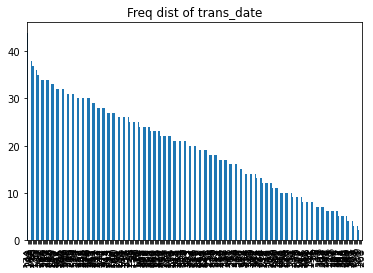

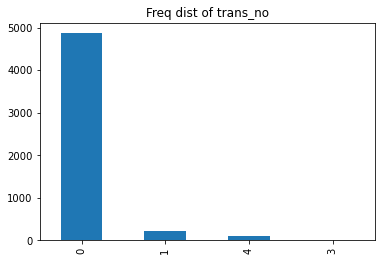

In [76]:
# Draw the barplots for categorical variables
remitCategorical = ['trans_date','trans_no']
for col in remitCategorical:
    remitSAR[col].value_counts().plot.bar(title='Freq dist of '+ col)
    plt.show()

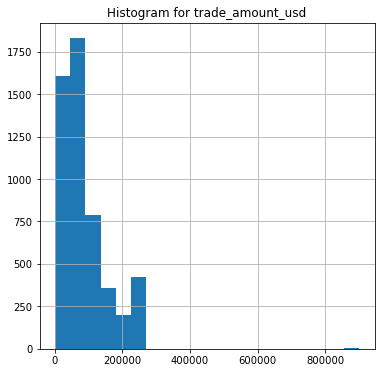

In [89]:
# Draw the histograms for numerical variables
remitNumerical = ['trade_amount_usd']
for col in remitNumerical:
    remitSAR[col].hist(figsize = (6,6), bins = 20)
    plt.title('Histogram for ' + col)
    plt.show()

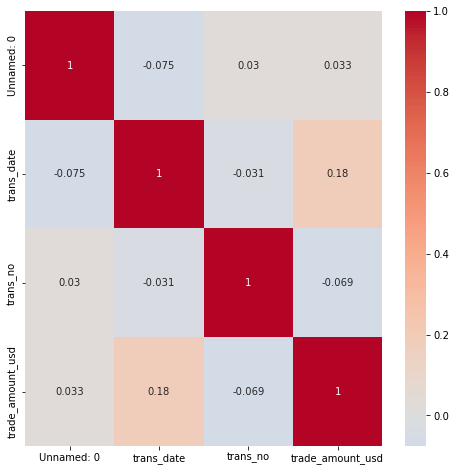

In [99]:
# Show the heatmap and the relationship of correlation
plt.figure(figsize=(8,8))
sns.heatmap(remitSAR.corr(), annot = True, center=0.0, cmap='coolwarm');
#sns.heatmap(dataset.corr(), annot = False, center=0.0, cmap='YlGnBu'); # cmap="YlGnBu",
plt.show()